In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
import netCDF4 as nc

In [50]:
def loadnc(fpath):

    ds = nc.Dataset(fpath)

    vars = ds.variables.keys()
    out = {}
    for v in vars :
        out[v] = np.array(ds[v][:])

    ds.close()

    return out

In [54]:
atmos = loadnc("../out/atm.nc")
refl  = np.loadtxt("../res/surface_albedos/lunar_marebasalt.dat").T

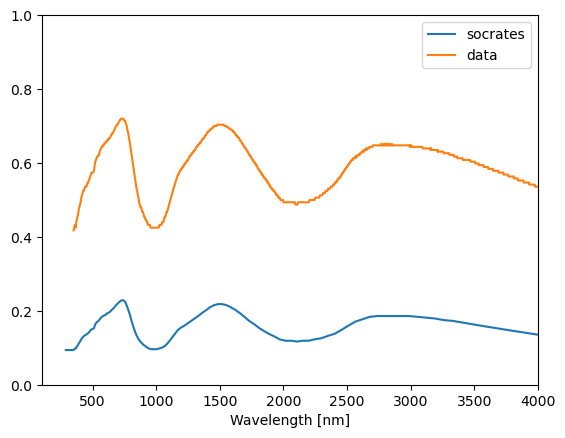

In [55]:
fig,ax = plt.subplots(1,1)

fl_U_SW = atmos["ba_U_SW"][-1,:]
fl_D_SW = atmos["ba_D_SW"][-1,:]
band_c  = 0.5 * (atmos["bandmax"]+atmos["bandmin"]) * 1e9 # nm

ax.plot(band_c, fl_U_SW/fl_D_SW, label="socrates")
ax.plot(refl[0], refl[1], label="data")

ax.set_xlim(left=100, right=4e3)
ax.set_xlabel("Wavelength [nm]")

ax.set_ylim(0,1)

ax.legend()
plt.show()